In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

Use the Pi function assumptions from Discord.

In [26]:
w_1, w_2, gamma, Y1, Y2 = symbols("w_1 w_2 gamma Y1 Y2")

pi_H = ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
pi_L = ((3-gamma)*w_2 - 2*w_1)/((1-gamma)*(w_1+w_2))
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))
dprofit_1 = diff(profit_1, w_1)
simplify(dprofit_1.subs(w_2, w_1))

-(Y1 + 2*w_1)/(4*w_1)

In [27]:
profit_2 = (Y2 - w_2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))
dprofit_2 = diff(profit_2, w_2)
#dprofit_2 = simplify(dprofit_2.subs(w_2, w_1))
simplify(dprofit_2.subs(w_2, w_1))

-Y2*gamma**2/(2*w_1) + 2*Y2*gamma/w_1 + Y2/(4*w_1) + gamma**2 - 2*gamma - 3/2

In [15]:
simplify(dprofit_1.subs(w_2, w_1 * (1-0.5*gamma)))

(-0.0078125*Y1*gamma + 0.015625*Y1 - 0.0009765625*gamma**3*w_1 + 0.01171875*gamma**2*w_1 - 0.03515625*gamma*w_1 + 0.03125*w_1)/(w_1*(0.0009765625*gamma**3 - 0.01171875*gamma**2 + 0.046875*gamma - 0.0625))

In [16]:
simplify(dprofit_2.subs(w_2, w_1 * (1-0.5*gamma)))

(-1.0*Y2*gamma**3 + 8.0*Y2*gamma**2 - 15.5*Y2*gamma - 1.0*Y2 + 0.125*gamma**5*w_1 - 2.0*gamma**4*w_1 + 10.875*gamma**3*w_1 - 22.5*gamma**2*w_1 + 10.75*gamma*w_1 + 6.0*w_1)/(w_1*(0.0625*gamma**3 - 0.75*gamma**2 + 3.0*gamma - 4.0))

In [24]:
pi_L = 0
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))
dprofit_1 = diff(profit_1, w_1)
simplify(dprofit_1.subs(w_2, w_1 * (1-0.5*gamma))).subs(gamma, 0.6)

-602.352941176471*(-0.00109375*Y1 + 0.00248828125*w_1)/w_1

In [7]:
profit_2 = (Y2 - w_2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))
dprofit_2 = diff(profit_2, w_2)
simplify(dprofit_2.subs(w_2, w_1 * (1-0.5*gamma))).subs(gamma, 1)

-5.33333333333333*(-0.5*Y2 + 0.25*w_1)/w_1

In [8]:
def _pi_H(w_1, w_2, gamma):
    return ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))

def _pi_L(w_1, w_2, gamma):
    return max(((3-gamma)*w_2 - 2*w_1)/((1-gamma)*(w_1+w_2)), 0)

def profit_1(w_1, w_2, gamma, pi_H, pi_L):
    Y1 = 1
    return (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))

def profit_2(w_1, w_2, gamma, pi_H, pi_L):
    Y2 = 0.1
    return (Y2 - w2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))

<ipython-input-8-22ba82be846e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
<ipython-input-8-22ba82be846e>:5: RuntimeWarning: invalid value encountered in double_scalars
  return max(((3-gamma)*w_2 - 2*w_1)/((1-gamma)*(w_1+w_2)), 0)


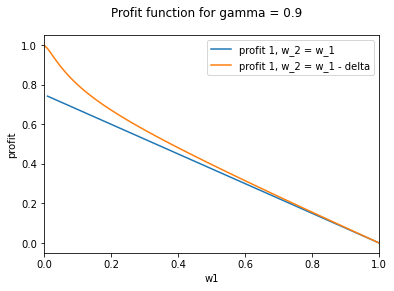

In [9]:
profits = []
profits2 = []

gamma = 0.9


for w_1 in np.linspace(0, 1, 100):
    w_2 = w_1
    pi_H = _pi_H(w_1, w_2, gamma)
    pi_L = _pi_L(w_1, w_2, gamma)
    profit = profit_1(w_1, w_2, gamma, pi_H, pi_L)
    profits.append(profit)
    
for w_1 in np.linspace(0, 1, 100):
    w_2 = w_1 + 0.1
    pi_H = _pi_H(w_1, w_2, gamma)
    pi_L = _pi_L(w_1, w_2, gamma)
    profit = profit_1(w_1, w_2, gamma, pi_H, pi_L)
    profits2.append(profit)
        
        
fig, ax = plt.subplots()
ax.set_xlim([0, 1])
plt.plot(np.linspace(0, 1, 100), profits, label = "profit 1, w_2 = w_1")
plt.plot(np.linspace(0, 1, 100), profits2, label = "profit 1, w_2 = w_1 - delta")
plt.xlabel("w1")
plt.ylabel("profit")
fig.suptitle(f"Profit function for gamma = {round(gamma, 2)}")
ax.legend()
plt.show()

<ipython-input-8-22ba82be846e>:2: RuntimeWarning: invalid value encountered in double_scalars
  return ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
<ipython-input-8-22ba82be846e>:5: RuntimeWarning: invalid value encountered in double_scalars
  return max(((3-gamma)*w_2 - 2*w_1)/((1-gamma)*(w_1+w_2)), 0)


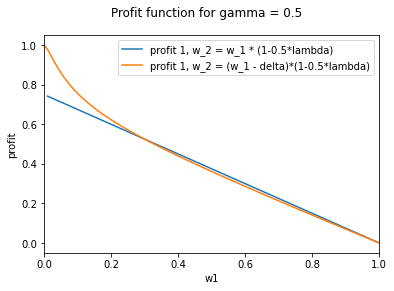

In [10]:
profits = []
profits2 = []

gamma = 0.5
gamma2 = 0.5

for w_1 in np.linspace(0, 1, 100):
    w_2 = (w_1) * (1-0.5*gamma2)
    pi_H = _pi_H(w_1, w_2, gamma)
    pi_L = _pi_L(w_1, w_2, gamma)
    profit = profit_1(w_1, w_2, gamma, pi_H, pi_L)
    profits.append(profit)
    
for w_1 in np.linspace(0, 1, 100):
    w_2 = (w_1+0.1) * (1-0.5*gamma2)
    pi_H = _pi_H(w_1, w_2, gamma)
    pi_L = _pi_L(w_1, w_2, gamma)
    profit = profit_1(w_1, w_2, gamma, pi_H, pi_L)
    profits2.append(profit)
        
        
fig, ax = plt.subplots()
ax.set_xlim([0, 1])
plt.plot(np.linspace(0, 1, 100), profits, label = "profit 1, w_2 = w_1 * (1-0.5*lambda)")
plt.plot(np.linspace(0, 1, 100), profits2, label = "profit 1, w_2 = (w_1 - delta)*(1-0.5*lambda)")
plt.xlabel("w1")
plt.ylabel("profit")
fig.suptitle(f"Profit function for gamma = {round(gamma, 2)}")
ax.legend()
plt.show()